In [5]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)

mu = [0, 0]
sigma = [[5, 4], [4, 5]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, size=n).T

In [7]:
# denote extreme values
set1 = np.argsort(np.linalg.norm(x, axis=0))[-20:]
set2 = list(set(range(n)) - set(set1))

<IPython.core.display.Javascript object>


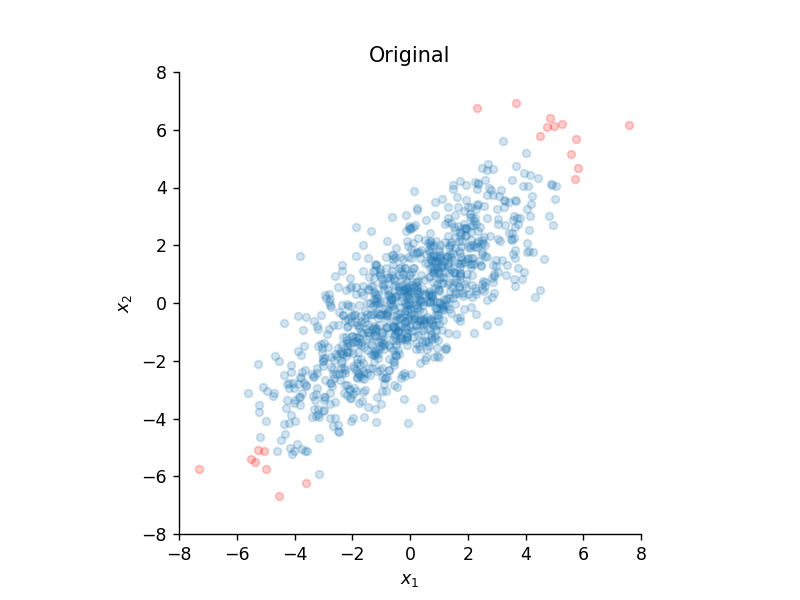

Text(0.5, 1.0, 'Original')

In [8]:
fig, ax = plt.subplots()
ax.scatter(x[0, set1], x[1, set1], s=20, c="red", alpha=0.2)
ax.scatter(x[0, set2], x[1, set2], s=20, alpha=0.2)
ax.set_aspect("equal")
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Original")

In [9]:
# Pearson correlation
np.corrcoef(x)[0, 1]

0.7797032317238085

In [14]:
# Calc covar matrix
covar_matrix = np.cov(x)
# Calc EigenVect and EigenVals
evals, evecs = np.linalg.eigh(covar_matrix)

## Principal Component Analysis

In [19]:
# get Withening matrix ('@' is numpy operator for matrix multiplication)
# and transform data
"""
Wpca = EigenVals ** (-1/2)
z = Wpca . x = (EigenVals ** (-1/2)) . EigenVect . x
"""
Zpca = np.diag(evals**(-1/2)) @ evecs.T @ x

<IPython.core.display.Javascript object>


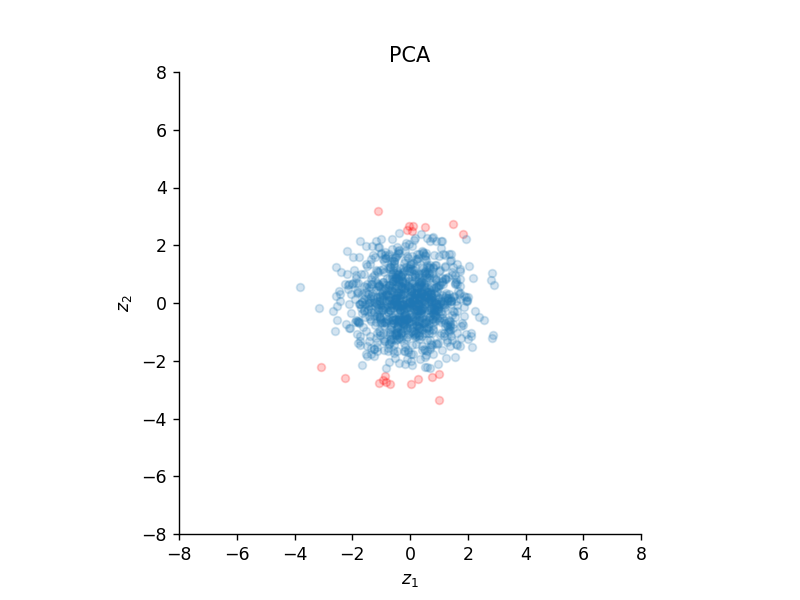

Text(0.5, 1.0, 'PCA')

In [24]:
fig, ax = plt.subplots()
ax.scatter(Zpca[0, set1], Zpca[1, set1], s=20, c="red", alpha=0.2)
ax.scatter(Zpca[0, set2], Zpca[1, set2], s=20, alpha=0.2)
ax.set_aspect("equal")
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("PCA")

In [21]:
np.corrcoef(Zpca)[0, 1]

1.5657659242125003e-17

## Zero-Phase Component Analysis

In [22]:
Zzca = evecs @ np.diag(evals**(-1/2)) @ evecs.T @ x

<IPython.core.display.Javascript object>


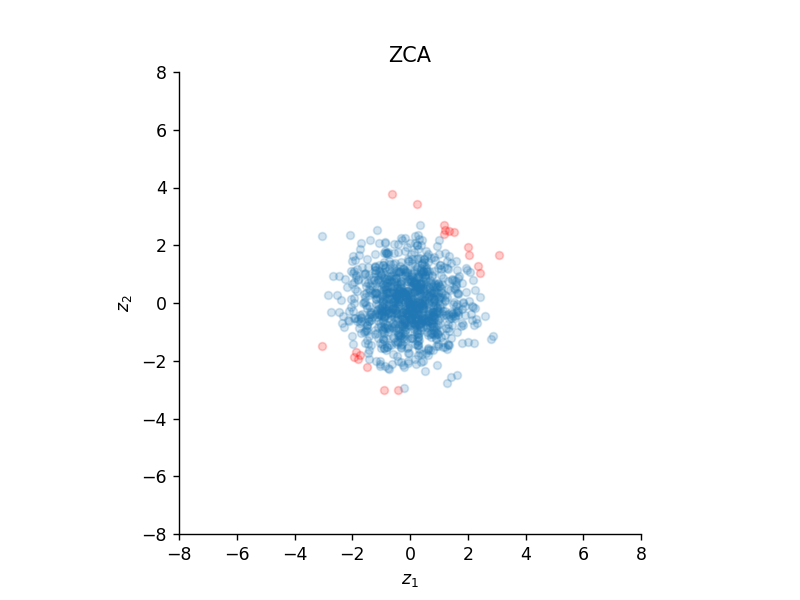

Text(0.5, 1.0, 'ZCA')

In [23]:
fig, ax = plt.subplots()
ax.scatter(Zzca[0, set1], Zzca[1, set1], s=20, c="red", alpha=0.2)
ax.scatter(Zzca[0, set2], Zzca[1, set2], s=20, alpha=0.2)
ax.set_aspect("equal")
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("ZCA")

In [25]:
np.corrcoef(Zzca)[0, 1]

2.222668717968283e-16